# **1. Perkenalan Dataset**


A. **Keterangan Dataset**.
>*  Nama : Jihan Kusumawardhani
*  MC : MC-32
*  ID :  MC361D5X2092
*  Tahun : 2025


B. **Sumber Dataset**.
>Dataset yang digunakan dalam penelitian ini diperoleh melalui platform Kaggle dengan nama *data_science_job*. Dataset tersebut dapat diakses melalui tautan berikut: [https://www.kaggle.com/datasets/vennela18/data-science-job](https://www.kaggle.com/datasets/vennela18/data-science-job).

C. **Alasan adanya Submission.**
> Analisis clustering dan klasifikasi yang dilakukan dalam penelitian ini bertujuan untuk memenuhi persyaratan proyek akhir dalam rangka menyelesaikan submission pada program pembelajaran *Belajar Machine Learning untuk Pemula* yang diselenggarakan oleh Dicoding. Proyek ini dirancang sebagai bentuk implementasi praktis dari konsep-konsep fundamental dalam pembelajaran mesin, yang mencakup teknik eksplorasi data, pemrosesan fitur, serta penerapan algoritma clustering dan klasifikasi guna memperoleh pemahaman yang lebih mendalam terhadap pola dalam dataset yang dianalisis.
   

In [14]:
file_path = '/content/data_science_job.csv'  #
try:
    data = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
    exit()

if len(data) < 1000:
    print("Error: Dataset kurang dari 1000 baris.")
elif not data.select_dtypes(include=['object']).columns.size or not data.select_dtypes(exclude=['object']).columns.size :
    print("Error: Dataset harus memiliki kolom kategorikal dan numerikal.")
else:
    print("Dataset memenuhi kriteria.")
    print(data.info())
    print(data.head())

    possible_labels = ['target', 'label', 'class', 'output']
    if any(label in data.columns for label in possible_labels):
        print("Warning: Dataset mungkin memiliki label. Pastikan dataset ini memang tanpa label.")


Dataset memenuhi kriteria.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   job_title           5000 non-null   object
 2   job_category        4500 non-null   object
 3   salary_currency     4500 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_in_usd       5000 non-null   int64 
 6   employee_residence  5000 non-null   object
 7   experience_level    4500 non-null   object
 8   employment_type     5000 non-null   object
 9   work_setting        5000 non-null   object
 10  company_location    5000 non-null   object
 11  company_size        4500 non-null   object
dtypes: int64(3), object(9)
memory usage: 468.9+ KB
None
   work_year                             job_title  job_category  \
0       2022  Machine Learning Engineer  in office      Analysis   
1

# **2. Import Library**

Pada tahap ini, diperlukan proses impor pustaka Python yang esensial untuk mendukung analisis data serta pengembangan model machine learning secara sistematis dan terstruktur.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, dataset perlu dimuat ke dalam notebook untuk keperluan analisis lebih lanjut. Jika dataset tersedia dalam format CSV, pemanfaatan pustaka *pandas* dapat digunakan untuk membaca dan mengolahnya. Penting untuk melakukan pemeriksaan awal terhadap beberapa baris pertama dataset guna memahami strukturnya serta memastikan bahwa data telah dimuat dengan akurat dan tanpa kesalahan.  

Apabila dataset tersimpan di Google Drive, maka langkah awal yang harus dilakukan adalah menghubungkan Google Drive dengan lingkungan *Google Colab* guna memungkinkan akses terhadap dataset. Setelah proses pemuatan berhasil, tahapan selanjutnya adalah melakukan verifikasi kesesuaian data sebelum memasuki tahap analisis lebih mendalam.

In [15]:
print("Tampilan Beberapa Baris Pertama dari Dataset:")
print(data.head())

print("\nInformasi Dataset:")
print(data.info())

print(f"\nJumlah baris: {data.shape[0]}, Jumlah kolom: {data.shape[1]}")

print("\nTipe Data Setiap Kolom:")
print(data.dtypes)

missing_values = data.isnull().sum()
print("\nJumlah Nilai Hilang di Setiap Kolom:")
print(missing_values[missing_values > 0])

print("\nStatistik Deskriptif untuk Kolom Numerikal:")
print(data.describe())

print("\nStatistik Deskriptif untuk Kolom Kategorikal:")
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    print(f"\nKolom: {col}")
    print(data[col].value_counts())
    print(f"Nilai unik: {data[col].unique()}")


Tampilan Beberapa Baris Pertama dari Dataset:
   work_year                             job_title  job_category  \
0       2022  Machine Learning Engineer  in office      Analysis   
1       2020                Statistician  (Remote)         ML/AI   
2       2022           Machine Learning Engineer           ML/AI   
3       2022               Data Analyst  in office         ML/AI   
4       2020                        Statistician    Data Science   

  salary_currency  salary  salary_in_usd employee_residence experience_level  \
0             EUR  186597         136086                 US               MI   
1             JPY  110630          67982                 JP               EX   
2             INR   61280         153309                 UK               MI   
3             JPY  154130         135242                 DE               SE   
4             EUR  172312          35156                 UK               MI   

  employment_type work_setting company_location company_size  
0

### **4. Exploratory Data Analysis (EDA)**  

Pada tahap ini, dilakukan **Exploratory Data Analysis (EDA)** guna memperoleh pemahaman yang mendalam terhadap karakteristik dataset. Proses EDA bertujuan untuk mengevaluasi struktur data, mengidentifikasi potensi permasalahan dalam data, serta menemukan pola atau hubungan antarvariabel yang dapat berkontribusi dalam tahap pemodelan selanjutnya.  

1. **Analisis Struktur Data**  
   - Mengevaluasi jumlah observasi (baris) dan atribut (kolom) dalam dataset.  
   - Mengidentifikasi tipe data pada setiap atribut, baik berupa numerik maupun kategorikal.  

2. **Penanganan Data yang Hilang**  
   - Melakukan identifikasi terhadap keberadaan data yang hilang (*missing values*) dalam dataset.  
   - Menentukan metode penanganan yang sesuai, seperti imputasi menggunakan nilai statistik tertentu atau penghapusan data yang tidak dapat diolah lebih lanjut.  

3. **Analisis Distribusi dan Korelasi Antarvariabel**  
   - Mengeksplorasi distribusi variabel numerik menggunakan teknik statistik deskriptif serta visualisasi seperti histogram dan boxplot.  
   - Mengukur hubungan antarvariabel melalui analisis korelasi menggunakan *correlation matrix* atau scatter plot guna mengidentifikasi kemungkinan adanya hubungan linear antara variabel tertentu.  

4. **Visualisasi Data**  
   - Menghasilkan representasi visual yang informatif, seperti diagram batang untuk variabel kategorikal dan distribusi probabilitas untuk variabel numerik.  
   - Menggunakan teknik visualisasi lanjutan, seperti heatmap dan pairplot, untuk memahami keterkaitan antarvariabel secara lebih komprehensif.  

Melalui tahap EDA ini, diharapkan dapat diperoleh wawasan awal yang komprehensif mengenai dataset, sehingga dapat mendukung pengambilan keputusan dalam tahapan analisis lebih lanjut, termasuk seleksi fitur, transformasi data, maupun pemilihan metode pemodelan yang optimal.

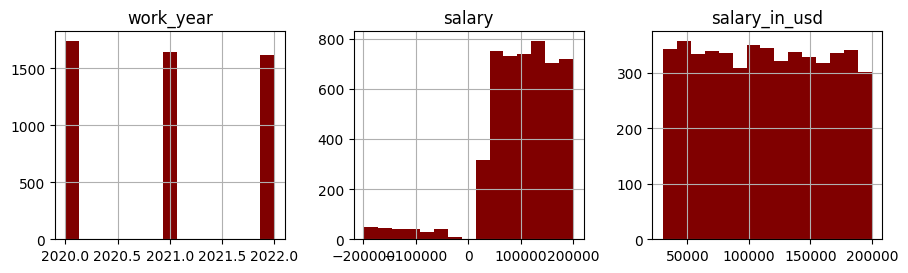

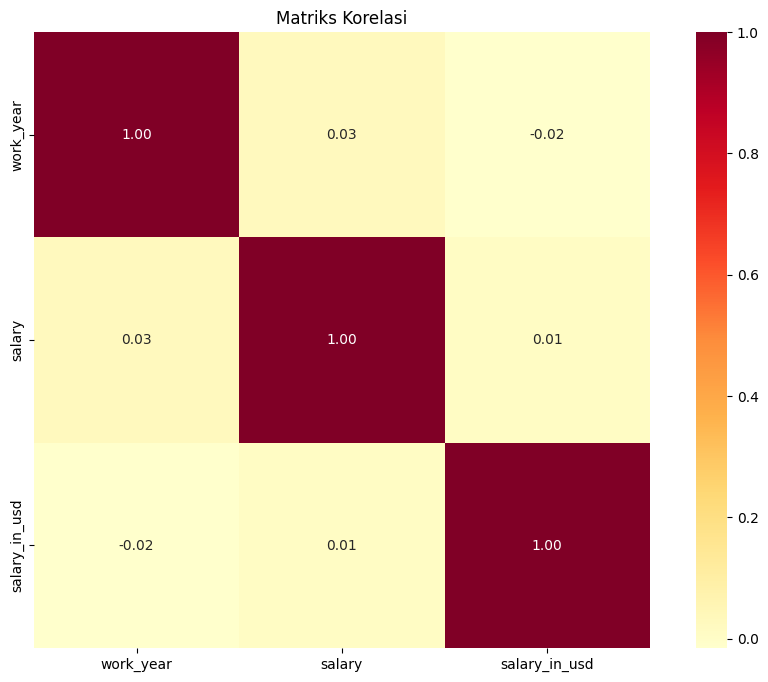

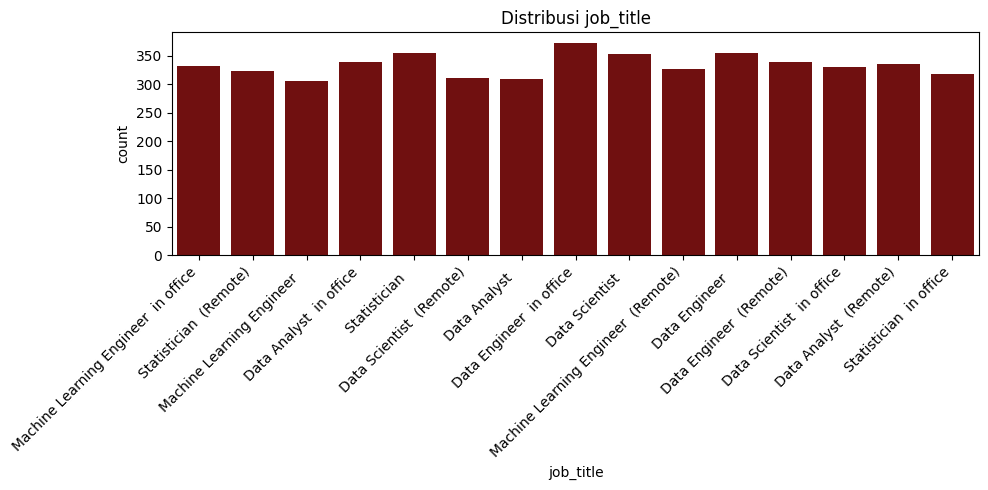

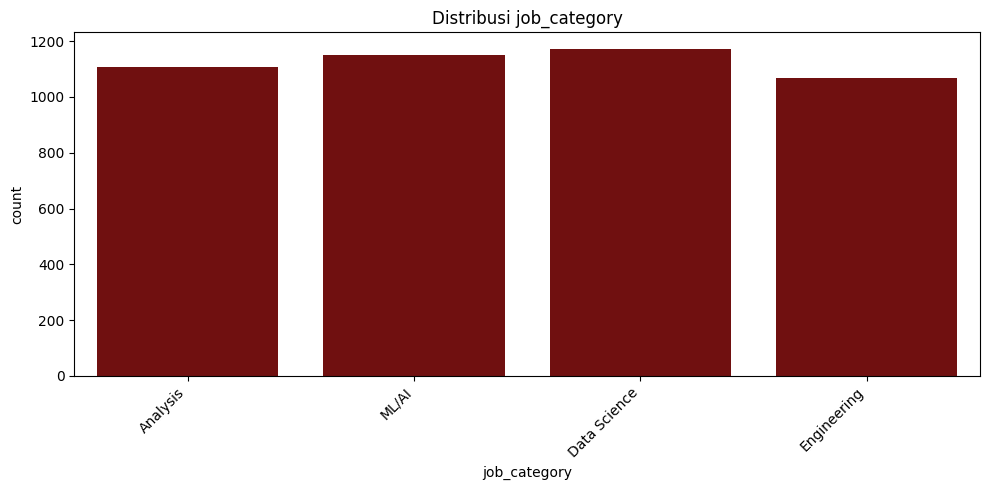

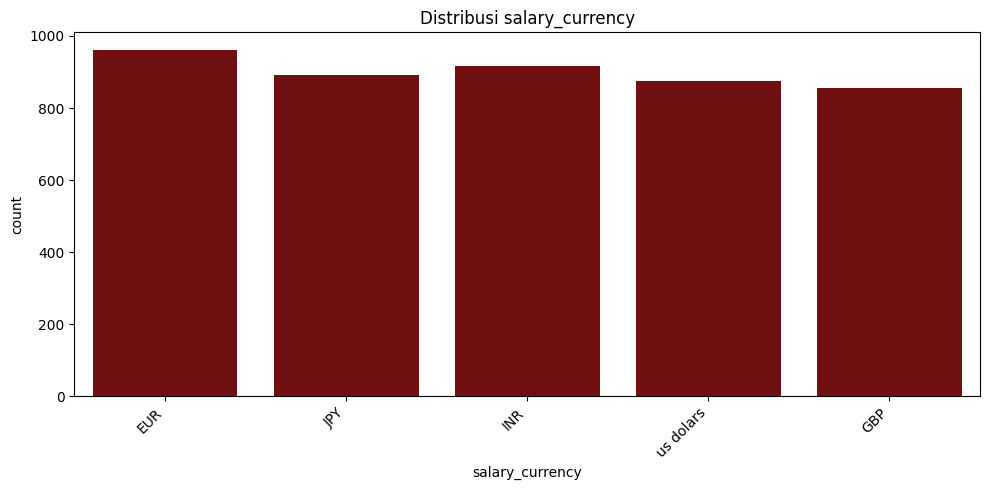

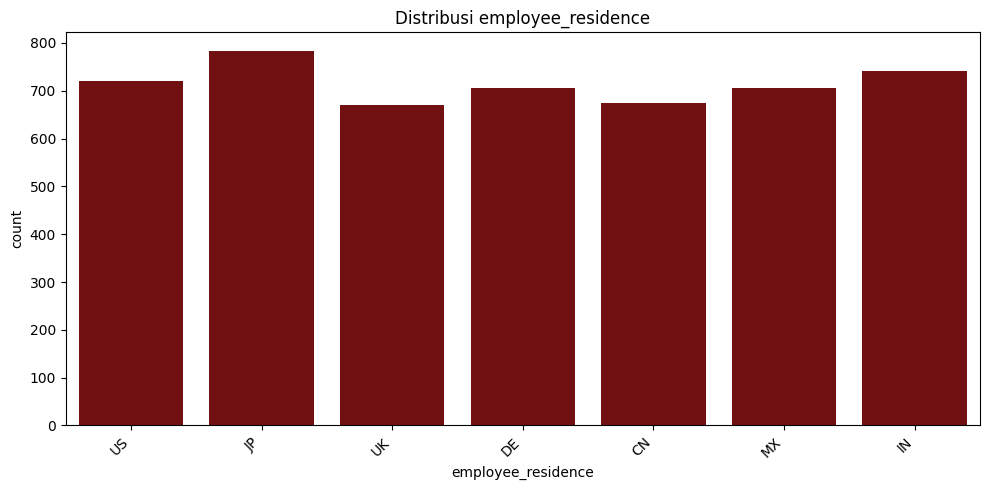

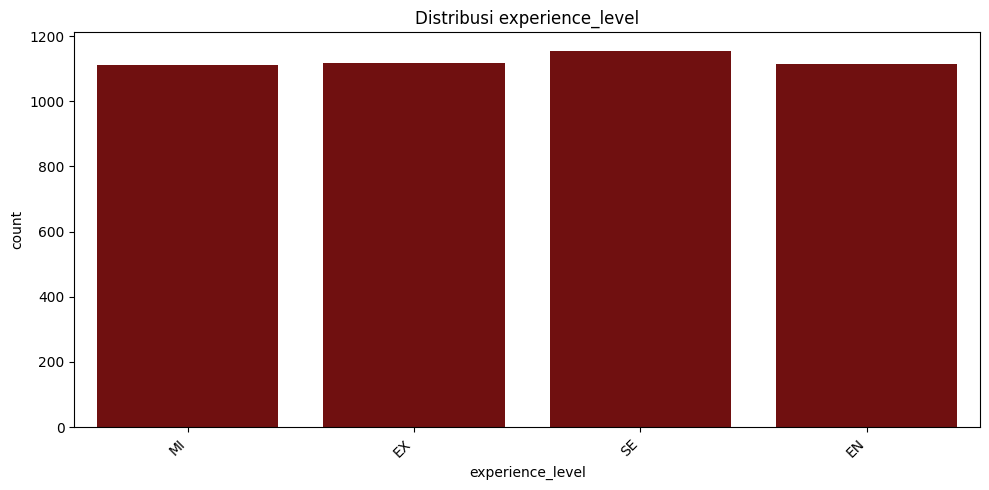

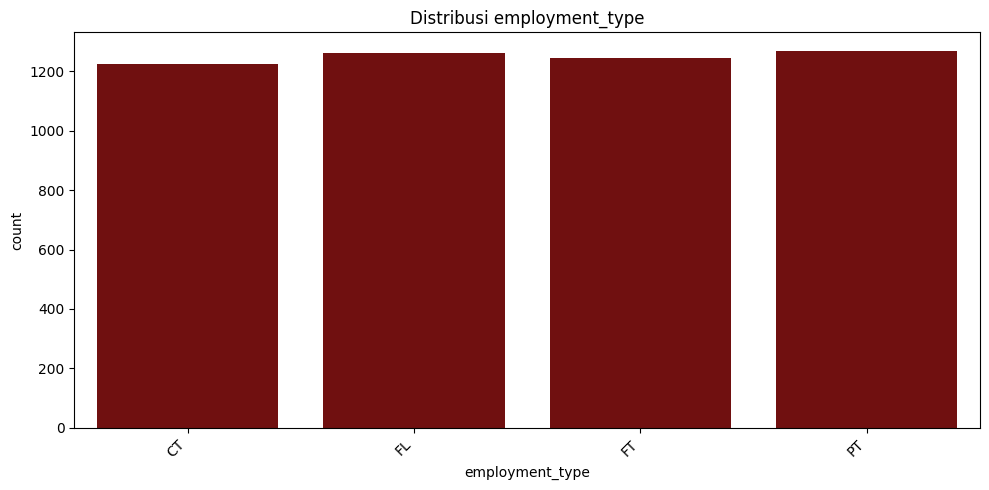

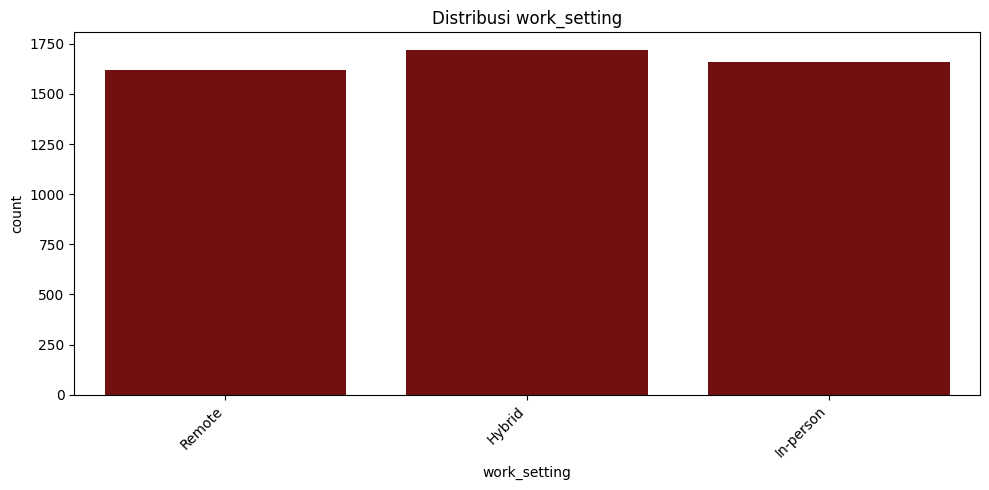

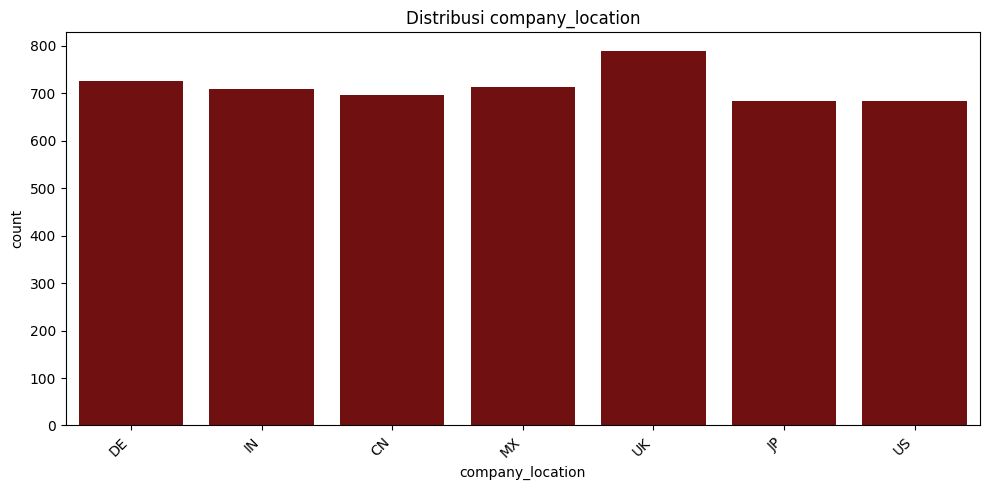

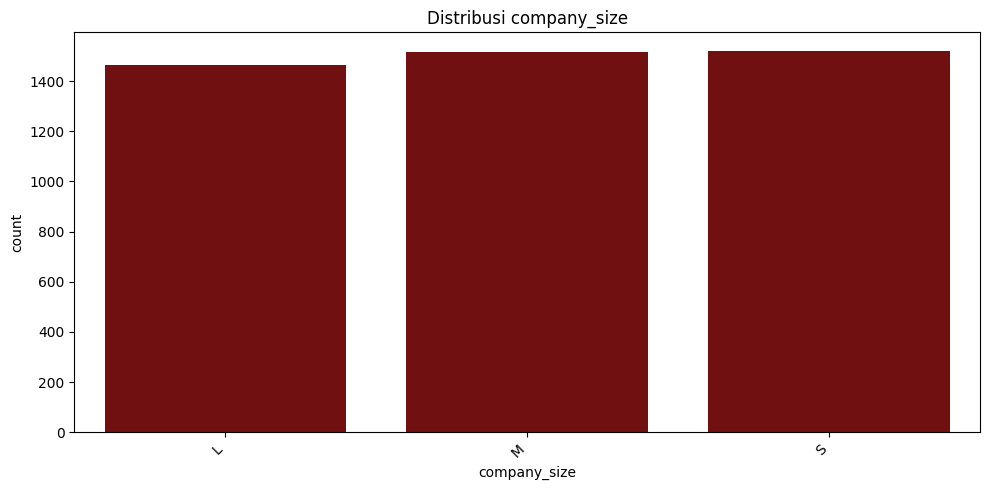

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas

# Assuming 'data' is your DataFrame, rename it to 'df'
df = data

# Replace 'df_cleaned' with 'df' in the following lines:
numerical_cols = df.select_dtypes(include=['float64', 'int']).columns  # Changed here
df[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(4, 5), color='maroon') #set color to maroon
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr() # Changed here
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='YlOrRd', square=True)
plt.title('Matriks Korelasi')
plt.show()

categorical_cols = df.select_dtypes(include=['object', 'category']).columns # Changed here
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, color='maroon') # Changed here
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, **preprocessing data** merupakan langkah krusial dalam memastikan kualitas data sebelum diterapkan dalam model **machine learning**. Data mentah sering kali mengandung **missing values**, duplikasi, serta distribusi nilai yang tidak seragam, yang dapat berdampak negatif terhadap performa model. Oleh karena itu, tahap **preprocessing** bertujuan untuk melakukan pembersihan dan transformasi data guna meningkatkan akurasi serta efektivitas analisis yang dilakukan.  

Beberapa tahapan utama dalam proses **data preprocessing**, namun tidak terbatas pada, meliputi:  
1. **Penanganan Missing Values**: Menghapus atau mengimputasi nilai yang hilang untuk mencegah bias dalam analisis.  
2. **Penghapusan Data Duplikat**: Mengeliminasi entri yang redundan guna menghindari pengaruh negatif terhadap model.  
3. **Normalisasi atau Standarisasi Fitur**: Menyamakan skala fitur numerik agar distribusi data lebih seimbang dan dapat meningkatkan performa model.  
4. **Deteksi dan Penanganan Outlier**: Mengidentifikasi serta menangani nilai ekstrem yang dapat mengganggu distribusi data.  
5. **Encoding Data Kategorikal**: Mengonversi variabel kategorikal ke dalam format numerik agar dapat diolah oleh model.  
6. **Binning (Pengelompokan Data)**: Mengelompokkan nilai numerik ke dalam beberapa kategori guna menyederhanakan struktur data dan meningkatkan interpretabilitas model.  

Tahapan-tahapan ini bersifat fleksibel dan dapat disesuaikan berdasarkan karakteristik dataset serta kebutuhan analisis yang dilakukan.

In [22]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['float64']).columns

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

df = df.drop_duplicates()

numerical_cols = df.select_dtypes(include=['float64']).columns

if len(numerical_cols) == 0:
    print("Tidak ada kolom numerikal untuk dinormalisasi.")
else:
    if df[numerical_cols].isnull().values.any():
        print("Masih ada nilai NaN di kolom numerikal. Silakan periksa pengisian nilai.")
    else:
        scaler = StandardScaler()
        df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))]

for col in numerical_cols:
    df[col] = remove_outliers_iqr(df[col])

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

bins = [0, 50000, 100000, 150000, 200000]
labels = ['Low', 'Medium', 'High', 'Very High']
df['salary_category'] = pd.cut(df['salary_in_usd'], bins=bins, labels=labels)

print(df.info())
print(df.head())


Tidak ada kolom numerikal untuk dinormalisasi.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 47 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   work_year                                       5000 non-null   int64   
 1   salary                                          5000 non-null   int64   
 2   salary_in_usd                                   5000 non-null   int64   
 3   job_title_Data Analyst  (Remote)                5000 non-null   bool    
 4   job_title_Data Analyst  in office               5000 non-null   bool    
 5   job_title_Data Engineer                         5000 non-null   bool    
 6   job_title_Data Engineer  (Remote)               5000 non-null   bool    
 7   job_title_Data Engineer  in office              5000 non-null   bool    
 8   job_title_Data Scientist                        5000 non-null

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, proses **pembangunan model clustering** dilakukan dengan memilih algoritma yang paling sesuai untuk mengelompokkan data berdasarkan kesamaan karakteristik. Pemilihan algoritma yang tepat sangat bergantung pada struktur data, jumlah cluster yang diharapkan, serta tujuan analisis yang ingin dicapai.  

Berikut adalah tahapan utama yang direkomendasikan dalam membangun model **clustering**:  
1. **Memilih Algoritma Clustering yang Tepat**: Menentukan algoritma yang paling sesuai, seperti **K-Means, Hierarchical Clustering, DBSCAN**, atau metode lainnya, berdasarkan karakteristik dataset dan tujuan analisis.  
2. **Melatih Model dengan Data**: Mengimplementasikan algoritma clustering pada data yang telah diproses untuk mengelompokkan sampel berdasarkan kesamaan fitur.  

Setelah model dikembangkan, tahap evaluasi perlu dilakukan guna menilai kualitas clustering yang dihasilkan, misalnya dengan menggunakan **Silhouette Score, Davies-Bouldin Index,** atau metrik lainnya yang relevan.

In [23]:
features = ['work_year', 'salary', 'salary_in_usd', 'job_category_Data Science', 'salary_currency_us dolars']
X = df[features]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

k_values = range(2, 10)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans_labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, kmeans_labels)
    silhouette_scores.append(score)
    print(f'Silhouette Score untuk KMeans dengan {k} cluster: {score}')

best_k = 5
final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10, max_iter=300)
final_kmeans_labels = final_kmeans.fit_predict(X_pca)

final_silhouette_score = silhouette_score(X_pca, final_kmeans_labels)
print(f'Silhouette Score untuk KMeans dengan {best_k} cluster: {final_silhouette_score}')

for cluster in range(best_k):
    cluster_points = X_pca[final_kmeans_labels == cluster]
    print(f'Cluster {cluster}: {len(cluster_points)} titik')

inertia = final_kmeans.inertia_
print(f'Inertia untuk KMeans dengan {best_k} cluster: {inertia}')


Silhouette Score untuk KMeans dengan 2 cluster: 0.5912356842240464
Silhouette Score untuk KMeans dengan 3 cluster: 0.6457394279607632
Silhouette Score untuk KMeans dengan 4 cluster: 0.6872095795771075
Silhouette Score untuk KMeans dengan 5 cluster: 0.8110009465441373
Silhouette Score untuk KMeans dengan 6 cluster: 0.8717205894175004
Silhouette Score untuk KMeans dengan 7 cluster: 0.8744174370907792
Silhouette Score untuk KMeans dengan 8 cluster: 0.8761615287325625
Silhouette Score untuk KMeans dengan 9 cluster: 0.8821183922043554
Silhouette Score untuk KMeans dengan 5 cluster: 0.8110009465441373
Cluster 0: 1106 titik
Cluster 1: 585 titik
Cluster 2: 1153 titik
Cluster 3: 1088 titik
Cluster 4: 1068 titik
Inertia untuk KMeans dengan 5 cluster: 88.95211755721657


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model **clustering**, terdapat beberapa metode yang dapat digunakan, seperti **Elbow Method** dan **Silhouette Score**. Pendekatan ini bertujuan untuk mengidentifikasi jumlah cluster yang menghasilkan pemisahan antar kelompok data yang paling efektif, sehingga model yang dibangun memiliki performa yang optimal.  

Berikut adalah tahapan yang direkomendasikan dalam proses pemilihan jumlah cluster:  
1. **Menggunakan Elbow Method dan Silhouette Score**:  
   - **Elbow Method** digunakan untuk menganalisis perubahan nilai **inertia** seiring bertambahnya jumlah cluster dan menentukan titik optimal di mana penurunan inertia mulai melambat.  
   - **Silhouette Score** mengukur kualitas cluster dengan menilai seberapa baik data dalam satu cluster saling berdekatan dibandingkan dengan cluster lainnya.  
2. **Menghitung Silhouette Score**:  
   - Evaluasi dilakukan dengan menghitung **Silhouette Score** untuk berbagai jumlah cluster guna menentukan konfigurasi yang menghasilkan pemisahan terbaik antar kelompok data.  

Dengan menerapkan metode ini, jumlah cluster yang optimal dapat diidentifikasi secara lebih objektif, sehingga model clustering yang dikembangkan mampu mengelompokkan data secara lebih akurat dan bermakna.

In [24]:
final_silhouette_score = silhouette_score(X_pca, final_kmeans_labels)
print(f'Silhouette Score untuk KMeans dengan {best_k} cluster: {final_silhouette_score}')

if final_silhouette_score < 0.80:
    print("Silhouette score kurang dari 0.80, mencoba meningkatkan jumlah cluster...")

    new_best_k = best_k + 1
    final_kmeans = KMeans(n_clusters=new_best_k, random_state=42, n_init=10, max_iter=300)
    final_kmeans_labels = final_kmeans.fit_predict(X_pca)
    final_silhouette_score = silhouette_score(X_pca, final_kmeans_labels)
    print(f'Silhouette Score untuk KMeans dengan {new_best_k} cluster: {final_silhouette_score}')

    if final_silhouette_score > 0.80:
        best_k = new_best_k
        print(f"Jumlah cluster terbaik diperbarui menjadi {best_k}")
    else:
        print(f"Mencoba nilai best_k yang lebih tinggi tidak meningkatkan silhouette score")

for cluster in range(best_k):
    cluster_points = X_pca[final_kmeans_labels == cluster]
    print(f'Cluster {cluster}: {len(cluster_points)} titik')

inertia = final_kmeans.inertia_
print(f'Inertia untuk KMeans dengan {best_k} cluster: {inertia}')

Silhouette Score untuk KMeans dengan 5 cluster: 0.8110009465441373
Cluster 0: 1106 titik
Cluster 1: 585 titik
Cluster 2: 1153 titik
Cluster 3: 1088 titik
Cluster 4: 1068 titik
Inertia untuk KMeans dengan 5 cluster: 88.95211755721657


## **d. Visualisasi Hasil Clustering**

Setelah model **clustering** dilatih dan jumlah cluster optimal telah ditentukan, langkah selanjutnya adalah melakukan **visualisasi hasil clustering** guna memahami pola yang terbentuk dalam data serta mengevaluasi kualitas pengelompokan.  

Berikut adalah tahapan yang direkomendasikan dalam proses visualisasi hasil clustering:  
1. **Menampilkan hasil clustering dalam bentuk visualisasi**:  
   - Gunakan **scatter plot** untuk menampilkan distribusi data berdasarkan hasil clustering.  
   - Jika jumlah fitur lebih dari dua, gunakan teknik **Principal Component Analysis (PCA) projection** untuk mereduksi dimensi data menjadi **2D** atau **3D**, sehingga pola antar cluster lebih mudah dianalisis.  
2. **Memberikan warna atau label pada setiap cluster**:  
   - Gunakan warna berbeda untuk setiap cluster agar pola pengelompokan dapat diinterpretasikan dengan lebih jelas.  
   - Jika memungkinkan, tambahkan **centroid** cluster pada plot untuk menunjukkan titik pusat dari setiap kelompok data.  

Dengan visualisasi yang tepat, interpretasi terhadap hasil clustering dapat dilakukan dengan lebih mudah, sehingga memberikan wawasan yang lebih mendalam terkait karakteristik masing-masing cluster.

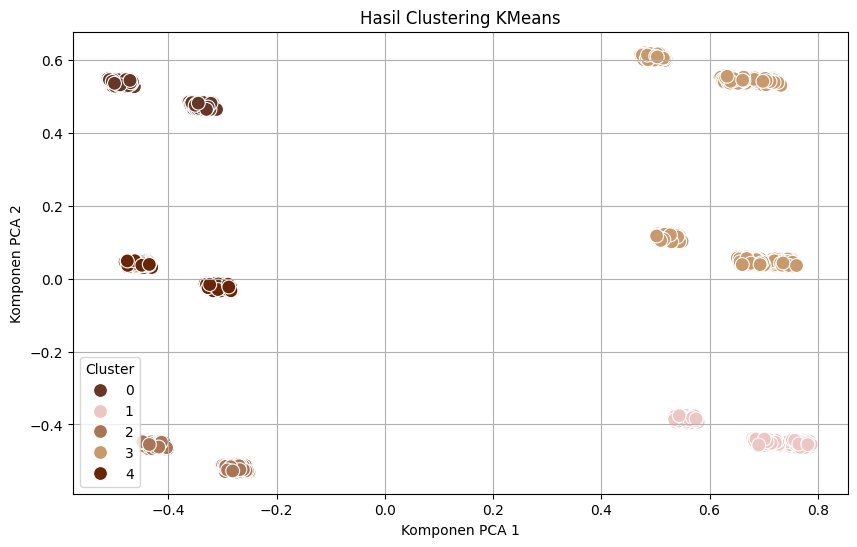

In [25]:
plt.figure(figsize=(10, 6))
colors = ['#663626', '#edc6c3', '#aa7557', '#c8996d', '#692507']
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=final_kmeans_labels, palette=colors, s=100)
plt.title('Hasil Clustering KMeans')
plt.xlabel('Komponen PCA 1')
plt.ylabel('Komponen PCA 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah proses **clustering** selesai, langkah berikutnya adalah **menganalisis karakteristik setiap cluster** untuk memahami perbedaan antar kelompok dan mengevaluasi apakah hasil clustering sesuai dengan tujuan yang diharapkan.  

Berikut adalah tahapan yang direkomendasikan dalam **analisis karakteristik cluster**:  

1. **Analisis karakteristik setiap cluster berdasarkan fitur yang tersedia**:  
   - Tinjau **distribusi nilai dalam setiap cluster** menggunakan statistik deskriptif seperti **mean, median, dan standar deviasi** untuk memahami perbedaan signifikan antar cluster.  
   - Gunakan **visualisasi seperti box plot atau bar chart** untuk menggambarkan variasi karakteristik dalam masing-masing cluster.  
   - Identifikasi fitur-fitur dominan yang membedakan satu cluster dari yang lain.  

2. **Interpretasi hasil clustering**:  
   - Evaluasi apakah hasil clustering sesuai dengan **ekspektasi dan logika bisnis** yang telah ditetapkan.  
   - Identifikasi **pola atau tren** yang dapat dimanfaatkan, misalnya untuk strategi pemasaran, segmentasi pelanggan, atau optimalisasi proses bisnis.  
   - Jika ditemukan anomali atau cluster yang tidak sesuai dengan pemahaman domain, pertimbangkan apakah perlu dilakukan **penyesuaian parameter model atau preprocessing tambahan**.  

Dengan melakukan analisis mendalam terhadap karakteristik cluster, model clustering dapat memberikan wawasan yang lebih bermakna dan actionable untuk pengambilan keputusan.

In [26]:

df['Cluster'] = final_kmeans_labels

cluster_summary = df.groupby('Cluster').agg({
    'work_year': ['mean', 'std', 'count'],
    'salary': ['mean', 'std'],
    'salary_in_usd': ['mean', 'std'],
    'job_category_Data Science': 'mean',
    'salary_currency_us dolars': 'mean'
}).reset_index()
cluster_summary


Cluster    work_year                         salary                 \
                  mean       std count           mean            std   
0       0  2022.000000  0.000000  1106  115293.911392   48704.434267   
1       1  2020.000000  0.000000   585   72874.705983  102907.982736   
2       2  2020.000000  0.000000  1153  113338.566349   49520.216390   
3       3  2021.474265  0.499567  1088   80542.970588   93142.783285   
4       4  2021.000000  0.000000  1068  114021.205993   48788.929246   

   salary_in_usd               job_category_Data Science  \
            mean           std                      mean   
0  111988.658228  48438.489032                       0.0   
1  115769.338462  48915.515516                       1.0   
2  113497.857762  49141.493189                       0.0   
3  113988.502757  49637.731640                       1.0   
4  116028.032772  49337.175046                       0.0   

  salary_currency_us dolars  
                       mean  
0                  0.202532  
1                  0.140171  
2                  0.182134  
3                  0.138787  
4                  0.194757

### **Analisis Karakteristik Setiap Cluster**  

Dalam proses analisis data, penerapan algoritma clustering bertujuan untuk mengelompokkan individu berdasarkan kesamaan karakteristik yang dimiliki. Dalam penelitian ini, diterapkan metode clustering yang menghasilkan lima kelompok (cluster) dengan karakteristik unik yang ditentukan oleh berbagai fitur dalam dataset. Analisis mendalam terhadap setiap cluster diperlukan untuk memahami pola yang muncul dan mengidentifikasi implikasi strategis yang dapat digunakan dalam pengambilan keputusan, baik dalam konteks pengembangan karier individu maupun dalam kebijakan rekrutmen di industri terkait.  

### **Cluster 0**  
- **Rata-rata Tahun Bekerja**: 2022  
- **Rata-rata Gaji**: $115,293.91  
- **Rata-rata Gaji dalam USD**: $111,988.66  
- **Keterlibatan dalam Kategori Pekerjaan Data Science**: Tidak ada  
- **Persentase Mata Uang USD**: 20.25%  
- **Jumlah Anggota**: 1106  

**Interpretasi**:  
Cluster ini didominasi oleh individu yang relatif baru dalam dunia kerja, dengan rata-rata tahun bekerja pada tahun 2022. Meskipun mereka masih berada dalam tahap awal karier, gaji rata-rata yang diperoleh cukup tinggi dibandingkan dengan beberapa cluster lainnya. Menariknya, tidak ada individu dalam cluster ini yang bekerja dalam kategori Data Science, yang mengindikasikan bahwa mereka mungkin berkecimpung dalam industri lain dengan tingkat kompensasi yang kompetitif. Beberapa sektor potensial yang mungkin menjadi tempat kerja bagi individu dalam cluster ini adalah teknologi informasi, keuangan, atau bidang lain yang menawarkan remunerasi tinggi bagi pekerja baru.  

### **Cluster 1**  
- **Rata-rata Tahun Bekerja**: 2020  
- **Rata-rata Gaji**: $72,874.71  
- **Rata-rata Gaji dalam USD**: $115,769.34  
- **Keterlibatan dalam Kategori Pekerjaan Data Science**: Ada  
- **Persentase Mata Uang USD**: 14.02%  
- **Jumlah Anggota**: 585  

**Interpretasi**:  
Individu yang termasuk dalam cluster ini memiliki pengalaman kerja rata-rata tiga tahun, dengan keterlibatan yang cukup signifikan dalam bidang Data Science. Meskipun mereka bekerja dalam industri yang dikenal memiliki pertumbuhan pesat dan prospek karier yang baik, gaji rata-rata yang diperoleh cenderung lebih rendah dibandingkan dengan beberapa cluster lainnya. Hal ini dapat disebabkan oleh berbagai faktor, termasuk tingkat persaingan dalam industri Data Science, perbedaan regional dalam kompensasi, atau posisi yang masih berada dalam tahap awal dalam hierarki pekerjaan.  

### **Cluster 2**  
- **Rata-rata Tahun Bekerja**: 2020  
- **Rata-rata Gaji**: $113,338.57  
- **Rata-rata Gaji dalam USD**: $113,497.86  
- **Keterlibatan dalam Kategori Pekerjaan Data Science**: Tidak ada  
- **Persentase Mata Uang USD**: 18.21%  
- **Jumlah Anggota**: 1153  

**Interpretasi**:  
Cluster ini memiliki kemiripan dalam hal pengalaman kerja dengan Cluster 1, tetapi terdapat perbedaan mencolok dalam tingkat kompensasi yang diterima. Dengan rata-rata gaji yang jauh lebih tinggi dibandingkan dengan Cluster 1, namun tanpa keterlibatan dalam bidang Data Science, dapat disimpulkan bahwa individu dalam kelompok ini bekerja di industri lain yang menawarkan kompensasi lebih tinggi. Sektor yang berpotensi menjadi tempat kerja individu dalam cluster ini termasuk keuangan, konsultasi, atau posisi eksekutif dalam industri teknologi yang memiliki struktur gaji yang lebih kompetitif.  

### **Cluster 3**  
- **Rata-rata Tahun Bekerja**: 2021.47  
- **Rata-rata Gaji**: $80,542.97  
- **Rata-rata Gaji dalam USD**: $113,988.50  
- **Keterlibatan dalam Kategori Pekerjaan Data Science**: Ada  
- **Persentase Mata Uang USD**: 13.88%  
- **Jumlah Anggota**: 1088  

**Interpretasi**:  
Individu dalam cluster ini memiliki pengalaman kerja yang sedikit lebih tinggi dibandingkan dengan Cluster 1, dan mereka juga bekerja dalam kategori Data Science. Meskipun gaji rata-rata dalam cluster ini lebih rendah dibandingkan dengan beberapa cluster lain, keberadaan mereka dalam industri Data Science menunjukkan bahwa mereka berada di bidang yang memiliki potensi pertumbuhan yang tinggi. Dengan perkembangan teknologi dan peningkatan permintaan terhadap tenaga kerja di bidang Data Science, individu dalam cluster ini berpotensi mengalami kenaikan gaji dalam jangka panjang seiring dengan meningkatnya pengalaman dan keahlian mereka.  

### **Cluster 4**  
- **Rata-rata Tahun Bekerja**: 2021  
- **Rata-rata Gaji**: $114,021.21  
- **Rata-rata Gaji dalam USD**: $116,028.03  
- **Keterlibatan dalam Kategori Pekerjaan Data Science**: Tidak ada  
- **Persentase Mata Uang USD**: 19.48%  
- **Jumlah Anggota**: 1068  

**Interpretasi**:  
Individu dalam cluster ini memiliki tingkat pengalaman kerja yang hampir setara dengan Cluster 3, namun mereka tidak bekerja dalam kategori Data Science. Menariknya, mereka memiliki tingkat kompensasi yang relatif tinggi, yang dapat mengindikasikan bahwa mereka bekerja dalam industri dengan struktur gaji yang lebih baik dibandingkan dengan sektor Data Science. Beberapa kemungkinan industri tempat individu dalam cluster ini bekerja adalah sektor keuangan, manajemen tingkat menengah hingga atas, atau spesialisasi teknologi yang memiliki nilai pasar lebih tinggi.  

### **Kesimpulan Umum**  
Berdasarkan hasil clustering ini, dapat disimpulkan bahwa terdapat perbedaan yang cukup signifikan dalam karakteristik setiap cluster, terutama dalam aspek pengalaman kerja, keterlibatan dalam bidang Data Science, dan tingkat kompensasi yang diterima. Beberapa temuan utama yang dapat diidentifikasi dari analisis ini adalah sebagai berikut:  

1. **Variasi kompensasi antar cluster** mengindikasikan adanya perbedaan signifikan dalam tingkat gaji berdasarkan bidang pekerjaan yang digeluti. Individu yang tidak terlibat dalam kategori Data Science cenderung memperoleh gaji yang lebih tinggi dibandingkan dengan mereka yang bekerja di bidang tersebut.  
2. **Individu dalam bidang Data Science** (terutama dalam Cluster 1 dan 3) memiliki gaji rata-rata yang lebih rendah dibandingkan dengan beberapa cluster lainnya. Hal ini dapat mencerminkan adanya persaingan tinggi dalam industri tersebut serta perbedaan dalam tingkat pengalaman dan senioritas individu yang termasuk dalam kelompok tersebut.  
3. **Cluster dengan individu yang lebih baru dalam dunia kerja** (seperti Cluster 0) memiliki tingkat kompensasi yang relatif kompetitif, meskipun mereka belum memasuki bidang Data Science. Hal ini menunjukkan bahwa sektor lain juga menawarkan peluang finansial yang menarik bagi pekerja baru.  
4. **Ketidakterlibatan dalam bidang Data Science** pada beberapa cluster cenderung berkorelasi dengan tingkat kompensasi yang lebih tinggi, mengindikasikan bahwa sektor lain mungkin memberikan remunerasi yang lebih baik dalam kondisi tertentu.  

Temuan ini memiliki implikasi penting bagi berbagai pihak, termasuk individu yang sedang merencanakan jalur karier mereka serta perusahaan yang ingin menarik dan mempertahankan talenta terbaik. Pemahaman yang lebih mendalam mengenai distribusi gaji dan faktor-faktor yang memengaruhinya dapat menjadi dasar yang kuat dalam menyusun strategi pengembangan sumber daya manusia yang lebih efektif.

# **7. Mengeksport Data**.

Simpan hasilnya ke dalam file CSV.

In [27]:
df['Cluster'] = final_kmeans_labels
output_file_path = '/content/data_science_job_clustered.csv'
df.to_csv(output_file_path, index=False)
print(f"Hasil clustering telah disimpan ke dalam {output_file_path}")

Hasil clustering telah disimpan ke dalam /content/data_science_job_clustered.csv
